In [2]:
import pandas as pd
#import and merge the data
df_2016_implicate = pd.read_sas('nsch_2016_implicate.sas7bdat')
df_2016_topical = pd.read_sas('nsch_2016_topical.sas7bdat')
nsch_2016 = pd.merge(df_2016_topical, df_2016_implicate, on='HHID')
nsch_2017 = pd.read_sas('nsch_2017_topical.sas7bdat')

col_2016 = set(nsch_2016.columns)
col_2017 = set(nsch_2017.columns)
common_col = list(col_2016.intersection(col_2017))
data = pd.concat([nsch_2016[common_col], nsch_2017[common_col]])

In [3]:
interested_var = ['SC_AGE_YEARS', 'SC_RACE_R', 'K2Q01', 'K6Q71_R', 'K6Q72_R', 'K7Q84_R',\
                  'K7Q85_R', 'K7Q82_R', 'K7Q83_R', 'BULLIED', 'K7Q70_R',\
                  'MEMORYCOND', 'ERRANDALONE', 'HEADACHE', 'K2Q33A', 'K2Q32A', 'K2Q34A',\
                  'SUBABUSE', 'K2Q31A', 'HCABILITY', 'K2Q05', 'BIRTHWT_VL', 'MOMAGE',\
                  'WGTCONC', 'K4Q01', 'TREATNEED', 'CONFIDENT', 'NEWACTIVITY', 'HURTSAD',\
                  'CALMDOWN', 'TEMPER', 'K7Q04R_R', 'REPEATED', 'K7Q30', 'K7Q31', 'K7Q32',\
                  'K7Q37', 'PHYSACTIV', 'MAKEFRIEND', 'K11Q43R', 'BEDTIME', 'HOURSLEEP05',\
                  'HOURSLEEP', 'K7Q60_R', 'K7Q91_R', 'K6Q60_R', 'K6Q61_R', 'K8Q21',\
                  'K8Q30', 'K8Q31', 'K8Q32', 'K8Q34', 'K8Q35', 'K6Q20', 'K8Q11', 'K9Q40',\
                  'K9Q41', 'TALKABOUT', 'WKTOSOLVE', 'STRENGTHS', 'HOPEFUL', 'ACE1',\
                  'FOODSIT', 'K11Q60', 'K11Q61', 'K11Q62', 'S9Q34', 'K10Q11', 'K10Q12',\
                  'K10Q13', 'K10Q14', 'K10Q20', 'K10Q22', 'K10Q23', 'K10Q30', 'K10Q31',\
                  'K10Q40_R', 'GOFORHELP', 'K10Q41_R', 'K9Q96', 'ACE3', 'ACE4', 'ACE5',\
                  'ACE6', 'ACE7', 'ACE8', 'ACE9', 'ACE10', 'A1_PHYSHEALTH', 'A1_MENTHEALTH']

In [4]:
len(interested_var)

90

In [5]:
data = data[interested_var]

In [6]:
data = data.dropna(axis='columns', thresh=data.shape[0]*0.5).dropna()

In [7]:
data.columns

Index(['SC_AGE_YEARS', 'SC_RACE_R', 'K2Q01', 'K6Q71_R', 'K7Q84_R', 'K7Q85_R',
       'K7Q82_R', 'K7Q83_R', 'BULLIED', 'K7Q70_R', 'MEMORYCOND', 'HEADACHE',
       'K2Q33A', 'K2Q32A', 'K2Q34A', 'SUBABUSE', 'K2Q31A', 'HCABILITY',
       'K2Q05', 'BIRTHWT_VL', 'MOMAGE', 'WGTCONC', 'K4Q01', 'K7Q04R_R',
       'REPEATED', 'K7Q30', 'K7Q31', 'K7Q32', 'K7Q37', 'PHYSACTIV',
       'MAKEFRIEND', 'K11Q43R', 'BEDTIME', 'HOURSLEEP', 'K7Q60_R', 'K7Q91_R',
       'K8Q21', 'K8Q30', 'K8Q31', 'K8Q32', 'K8Q34', 'K8Q35', 'K8Q11', 'K9Q40',
       'TALKABOUT', 'WKTOSOLVE', 'STRENGTHS', 'HOPEFUL', 'ACE1', 'FOODSIT',
       'K11Q60', 'K11Q61', 'K11Q62', 'S9Q34', 'K10Q11', 'K10Q12', 'K10Q13',
       'K10Q14', 'K10Q20', 'K10Q22', 'K10Q23', 'K10Q30', 'K10Q31', 'K10Q40_R',
       'GOFORHELP', 'K10Q41_R', 'K9Q96', 'ACE3', 'ACE4', 'ACE5', 'ACE6',
       'ACE7', 'ACE8', 'ACE9', 'ACE10', 'A1_PHYSHEALTH', 'A1_MENTHEALTH'],
      dtype='object')

In [8]:
data['ACE'] = (2-data['ACE3']) +\
           (2-data['ACE4']) +\
           (2-data['ACE5']) +\
           (2-data['ACE6']) +\
           (2-data['ACE7']) +\
           (2-data['ACE8']) +\
           (2-data['ACE9']) +\
           (2-data['ACE10'])

In [9]:
data.shape

(34821, 78)

In [10]:
data['SC_AGE_YEARS'].describe()

count    34821.000000
mean        12.106631
std          3.445844
min          6.000000
25%          9.000000
50%         12.000000
75%         15.000000
max         17.000000
Name: SC_AGE_YEARS, dtype: float64

In [11]:
data['SC_RACE_R'].value_counts()/34821

1.0    0.793573
7.0    0.071710
2.0    0.054852
4.0    0.047730
6.0    0.022199
3.0    0.006892
5.0    0.003044
Name: SC_RACE_R, dtype: float64

In [12]:
#train test split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import xgboost as xgb
from pyearth import Earth
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import warnings
from sklearn.model_selection import RandomizedSearchCV
warnings.filterwarnings('ignore')


X = data.drop(columns=['K2Q32A'])
y = data['K2Q32A']

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=42) 

In [54]:
barplot = pd.DataFrame(y.value_counts())

In [55]:
barplot['Diagnose'] = ['No', 'Yes']

In [56]:
barplot

,K2Q32A,Diagnose
2.0,32673,No
1.0,2148,Yes


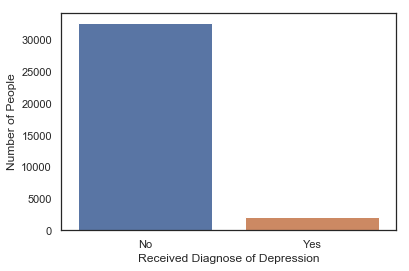

In [59]:
import seaborn as sns
sns.barplot(x="Diagnose", y='K2Q32A', data=barplot)
#plt.title('Unbalanced Outcome Variable in the Dataset', fontsize=15)
plt.xlabel('Received Diagnose of Depression')
plt.ylabel('Number of People')
plt.savefig('unbalanced')
plt.show()

In [13]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
sampler1 = RandomUnderSampler(random_state=42)
sampler2 = SMOTE(random_state=42)
sampler3 = ADASYN(random_state=42)
sampler4 = RandomOverSampler(random_state=42)

sampler = [sampler1, sampler2, sampler3, sampler4]

In [188]:
#Decision tree

for s in sampler:
    dt_clf = Pipeline([('sampler', s), ('dt', DecisionTreeClassifier())])
    dt_params = {'dt__criterion': ['gini', 'entropy'],\
                 'dt__splitter': ['best', 'random'],\
                 'dt__max_depth': [None, 2, 3, 4, 5, 6, 7, 50, 100, 1000],\
                }

    dt_tune = RandomizedSearchCV(dt_clf, dt_params, cv=10, scoring='accuracy').fit(X_train, y_train)

    print("Decision tree:")
    print(dt_tune.best_params_)

Decision tree:
{'dt__splitter': 'best', 'dt__max_depth': 2, 'dt__criterion': 'gini'}
Decision tree:
{'dt__splitter': 'best', 'dt__max_depth': 7, 'dt__criterion': 'entropy'}
Decision tree:
{'dt__splitter': 'best', 'dt__max_depth': 7, 'dt__criterion': 'gini'}
Decision tree:
{'dt__splitter': 'random', 'dt__max_depth': None, 'dt__criterion': 'gini'}


In [11]:
dt1 = make_pipeline(sampler1, DecisionTreeClassifier(criterion='gini', max_depth=2, splitter='best'))
dt2 = make_pipeline(sampler2, DecisionTreeClassifier(criterion='entropy', max_depth=7, splitter='best'))
dt3 = make_pipeline(sampler3, DecisionTreeClassifier(criterion='gini', max_depth=7, splitter='best'))
dt4 = make_pipeline(sampler4, DecisionTreeClassifier(criterion='gini', max_depth=None, splitter='random'))

In [189]:
#Bagging
for s in sampler:
    bg_clf = Pipeline([('sampler', s), ('bg', BaggingClassifier())])
    bg_params = {'bg__n_estimators': [10, 15, 20, 25, 30, 35, 40, 50, 70, 100, 200],\
                 'bg__max_samples': [1, 2, 3, 4, 5, 6, 7, 8, 9],\
                 'bg__max_features': [1.0, 0.8, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1],\
                 'bg__bootstrap':[True, False],\
                 'bg__bootstrap_features': [True, False]}

    bg_tune = RandomizedSearchCV(bg_clf, bg_params, cv=10, scoring='accuracy').fit(X_train, y_train)

    print("Bagging:")
    print(bg_tune.best_params_)

Bagging:
{'bg__n_estimators': 100, 'bg__max_samples': 5, 'bg__max_features': 0.2, 'bg__bootstrap_features': False, 'bg__bootstrap': False}
Bagging:
{'bg__n_estimators': 100, 'bg__max_samples': 5, 'bg__max_features': 0.8, 'bg__bootstrap_features': True, 'bg__bootstrap': True}
Bagging:
{'bg__n_estimators': 100, 'bg__max_samples': 6, 'bg__max_features': 1.0, 'bg__bootstrap_features': False, 'bg__bootstrap': False}
Bagging:
{'bg__n_estimators': 200, 'bg__max_samples': 4, 'bg__max_features': 0.6, 'bg__bootstrap_features': False, 'bg__bootstrap': True}


In [12]:
bg1=make_pipeline(sampler1, BaggingClassifier(n_estimators=100, max_samples=5,\
                                             max_features=0.2, bootstrap_features=False, bootstrap=False))
bg2=make_pipeline(sampler2, BaggingClassifier(n_estimators=100, max_samples=5,\
                                             max_features=0.8, bootstrap_features=True, bootstrap=True))
bg3=make_pipeline(sampler3, BaggingClassifier(n_estimators=100, max_samples=6,\
                                             max_features=1.0, bootstrap_features=False, bootstrap=False))
bg4=make_pipeline(sampler4, BaggingClassifier(n_estimators=200, max_samples=4,\
                                             max_features=0.6, bootstrap_features=False, bootstrap=True))

In [190]:
#random forest
for s in sampler:
    rf_clf = Pipeline([('sampler', s), ('rf', RandomForestClassifier())])
    rf_params = {'rf__bootstrap': [True, False],
                 'rf__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                 'rf__max_features': ['auto', 'sqrt'],
                 'rf__min_samples_leaf': [1, 2, 4],
                 'rf__min_samples_split': [2, 5, 10],
                 'rf__n_estimators': [  200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

    rf_tune = RandomizedSearchCV(rf_clf, rf_params, cv=10, scoring='accuracy').fit(X_train, y_train)
    
    print("random forest:")
    print(rf_tune.best_params_)

random forest:
{'rf__n_estimators': 1600, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 1, 'rf__max_features': 'auto', 'rf__max_depth': 10, 'rf__bootstrap': True}
random forest:
{'rf__n_estimators': 600, 'rf__min_samples_split': 5, 'rf__min_samples_leaf': 4, 'rf__max_features': 'sqrt', 'rf__max_depth': 20, 'rf__bootstrap': False}
random forest:
{'rf__n_estimators': 1200, 'rf__min_samples_split': 5, 'rf__min_samples_leaf': 4, 'rf__max_features': 'sqrt', 'rf__max_depth': 30, 'rf__bootstrap': False}
random forest:
{'rf__n_estimators': 800, 'rf__min_samples_split': 10, 'rf__min_samples_leaf': 1, 'rf__max_features': 'auto', 'rf__max_depth': 50, 'rf__bootstrap': True}


In [14]:
rf1 = make_pipeline(sampler1, RandomForestClassifier(n_estimators=1600, min_samples_split=2,\
                                                  min_samples_leaf=1, max_features='auto',\
                                                  max_depth=10, bootstrap=True))
rf2 = make_pipeline(sampler2, RandomForestClassifier(n_estimators=600, min_samples_split=5,\
                                                  min_samples_leaf=4, max_features='sqrt',\
                                                  max_depth=20, bootstrap=False))
rf3 = make_pipeline(sampler3, RandomForestClassifier(n_estimators=1200, min_samples_split=5,\
                                                  min_samples_leaf=4, max_features='sqrt',\
                                                  max_depth=30, bootstrap=False))
rf4 = make_pipeline(sampler4, RandomForestClassifier(n_estimators=800, min_samples_split=10,\
                                                  min_samples_leaf=1, max_features='auto',\
                                                  max_depth=50, bootstrap=True))

In [13]:
models = {'Decision Tree_1': dt1,\
          'Decision Tree_2': dt2,\
          'Decision Tree_3': dt3,\
          'Decision Tree_4': dt4,\
          'Bagging1': bg1,\
          'Bagging2': bg2,\
          'Bagging3': bg3,\
          'Bagging4': bg4,\
          'Random Forest1': rf1,\
          'Random Forest2': rf2,\
          'Random Forest3': rf3,\
          'Random Forest4': rf4}

auc_ls = [np.mean(cross_val_score(models[key], X_train, y_train, cv=5, scoring='roc_auc')) for key in models.keys()]
acc_ls = [np.mean(cross_val_score(models[key], X_train, y_train, cv=5, scoring='accuracy')) for key in models.keys()]

In [17]:
import seaborn as sns
sns.set(color_codes=True)

In [14]:
df = pd.DataFrame({'Models': [k for k in models],\
                   'Accuracy': acc_ls,\
                   'ROC/AUC': auc_ls})

In [15]:
df

,Models,Accuracy,ROC/AUC
0,Decision Tree_1,0.876304,0.879954
1,Decision Tree_2,0.925536,0.921897
2,Decision Tree_3,0.929556,0.911946
3,Decision Tree_4,0.925412,0.662930
4,Bagging1,0.883935,0.892783
5,Bagging2,0.880242,0.912095
6,Bagging3,0.889471,0.917639
7,Bagging4,0.900919,0.900603
8,Random Forest1,0.865758,0.942898
9,Random Forest2,0.949331,0.943266


In [ ]:
from skater.model import InMemoryModel
from skater.core.explanations import Interpretation

rf4.fit(X, y)
model = InMemoryModel(rf4.predict_proba, examples=X)
interpreter = Interpretation(X)
interpreter.load_data(X)
importance = interpreter.feature_importance.feature_importance(model)

importance = importance.to_frame(name='Importance Score')
importance = importance.sort_values(by='Importance Score', ascending=False)
importance.reset_index(level=0, inplace=True)
importance = importance.rename(columns={'index': 'feature'})
figure1_df = importance[0:10]

In [18]:
df_new = pd.DataFrame({"Features":['Anxiety',\
                          'Age',\
                          'Health Affected Ability',\
                          'Difficulty Making Friends',\
                          'General Health',\
                          'Adverse Childhood Experience',\
                          'Child Hard to Care for',\
                          'Time Spent with Computers',\
                          'Does All Requred Homework',\
                          'Bullied'],\
             "Importance Score": [0.109480, 0.065499, 0.059487, 0.036408, 0.031489,\
                                  0.031167, 0.030625, 0.028898, 0.028818, 0.027364]})

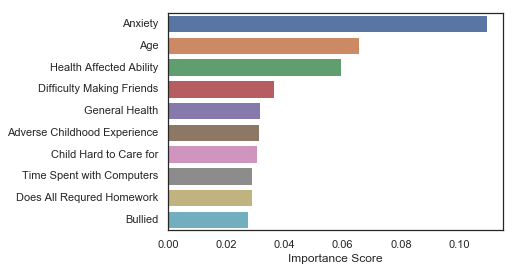

In [37]:
sns.barplot(x="Importance Score", y="Features", data=df_new)
plt.yticks(rotation=0, fontsize="11", va="center")
plt.ylabel("")
#plt.title("10 Most Important Features", fontsize=15)
plt.savefig('Feature Importance')
plt.show()

In [21]:
figure1_df

,feature,Importance Score,Features
0,K2Q33A,0.109480,Anxiety
1,SC_AGE_YEARS,0.065499,Age
2,HCABILITY,0.059487,Health Affected Ability
3,MAKEFRIEND,0.036408,Difficulty Making Friends
4,K2Q01,0.031489,General Health
5,ACE,0.031167,Adverse Childhood Experience
6,K8Q31,0.030625,Child Hard to Care for
7,K7Q91_R,0.028898,Time Spent with Computers
8,K7Q83_R,0.028818,Does All Requred Homework
9,BULLIED,0.027364,Bullied


In [21]:
df_new['feature']=['K2Q33A', 'SC_AGE_YEARS', 'HCABILITY', 'MAKEFRIEND', 'K2Q01',\
                   'ACE', 'K8Q31', 'K7Q91_R', 'K7Q83_R', 'BULLIED']

In [ ]:
sns.barplot(x='Importance Score', y='Features')

In [27]:
XX = X[df_new['feature']]
X_res, y_res = sampler4.fit_resample(XX, y)

In [28]:
y_res

array([2., 2., 2., ..., 1., 1., 1.])

In [29]:
y_res = 2 - y_res

In [30]:
y_res

array([0., 0., 0., ..., 1., 1., 1.])

In [31]:
X_res[:,0]

array([2., 2., 1., ..., 1., 1., 1.])

In [32]:
X_res[:,0] = 2-X_res[:,0]

In [40]:
import statsmodels.formula.api as sm
model = sm.Logit(y_res, X_res)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.341379
         Iterations 7


In [41]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                65346
Model:                          Logit   Df Residuals:                    65336
Method:                           MLE   Df Model:                            9
Date:                Tue, 11 Jun 2019   Pseudo R-squ.:                  0.5075
Time:                        18:13:10   Log-Likelihood:                -22308.
converged:                       True   LL-Null:                       -45294.
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.8097      0.028     98.851      0.000       2.754       2.865
x2             0.1525      0.004     35.970      0.000       0.144       0.161
x3             0.2617      0.015     17.514      0.000       0.232       0.291
x4            -0.3610      0.022    -16.722      0.000      -0.403      -0.319
x5             0.1010      0.017      6.045      0.000       0.068       0.134
x6             0.3316      0.009     37.520      0.000       0.314       0.349
x7             0.1788      0.014     12.874      0.000       0.152       0.206
x8             0.0082      0.010      0.865      0.387      -0.010       0.027
x9             0.1749      0.020      8.677      0.000       0.135       0.214
x10           -1.6405      0.017    -94.470      0.000      -1.675      -1.606
==============================================================================
"""

In [42]:
df_coef = pd.DataFrame(result.params, columns=['coef'])
df_coef['error_bar'] = pd.DataFrame(result.params - result.conf_int()[:, 0])
df_coef['features'] =df_new['Features']

In [43]:
df_coef

,coef,error_bar,features
0,2.809673,0.055709,Anxiety
1,0.152505,0.008310,Age
2,0.261684,0.029284,Health Affected Ability
3,-0.360973,0.042310,Difficulty Making Friends
4,0.100981,0.032743,General Health
5,0.331558,0.017320,Adverse Childhood Experience
6,0.178834,0.027225,Child Hard to Care for
7,0.008231,0.018642,Time Spent with Computers
8,0.174853,0.039497,Does All Requred Homework
9,-1.640498,0.034035,Bullied


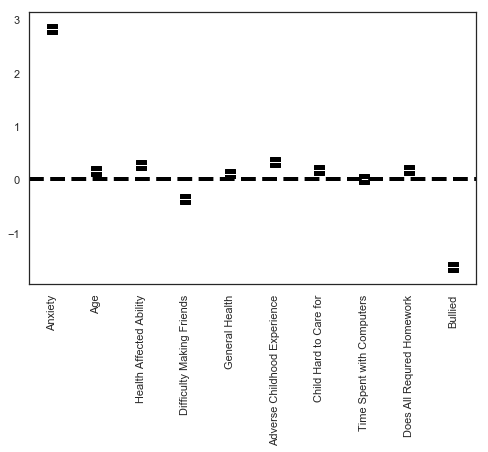

In [50]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8, 5))
df_coef.plot(x='features', y='coef', kind='bar', 
             ax=ax, color='none', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(df_coef.shape[0]), 
           marker='s', s=100, 
           y=df_coef['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
'''
_ = ax.set_xticklabels(['Anxiety*',\
                          'Age*',\
                          'Health Affected Ability*',\
                          'Difficulty Making Friends*',\
                          'General Health*',\
                          'Adverse Childhood Experience*',\
                          'Child Hard to Care for*',\
                          'Time Spent with Computers',\
                          'Does All Requred Homework*',\
                          'Bullied*'], rotation=60, fontsize=16)
'''
#plt.title('Coefficients of Independent Variables (* if significant)', fontsize=18)
plt.show()


In [ ]:
f.savefig('lr.png')

In [56]:
X_new = pd.DataFrame(X_res, columns=df_new['Features'])
y_new = pd.DataFrame(y_res, columns=['Depression'])

In [57]:
df = pd.concat([X_new, y_new], axis=1)


In [99]:
import seaborn as sns
sns.set(style="darkgrid")

In [65]:
f.savefig('lr.png')

In [24]:
from pycebox.ice import ice, ice_plot

In [34]:
rf4.fit(X, y)

Pipeline(memory=None,
     steps=[('randomoversampler', RandomOverSampler(random_state=42, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [35]:
def plot_ice(var_name, real_name):
    colath_ice = ice(X, var_name, lambda x: rf4.predict_proba(x)[:,0])
    ice_plot(colath_ice, c='dimgray', linewidth=.3, plot_pdp=True, centered=True)
    plt.xlabel(real_name)

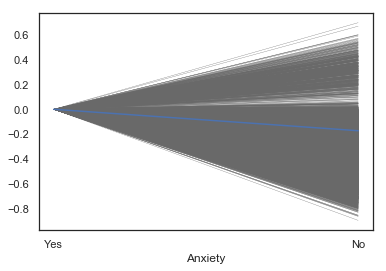

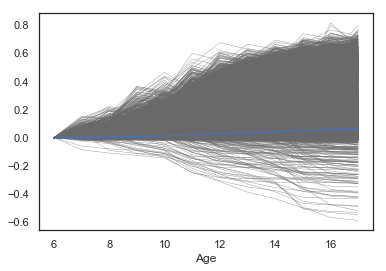

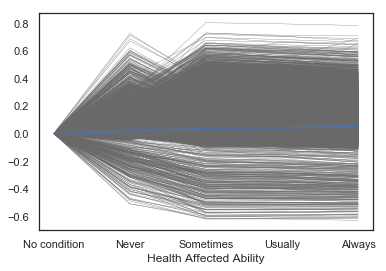

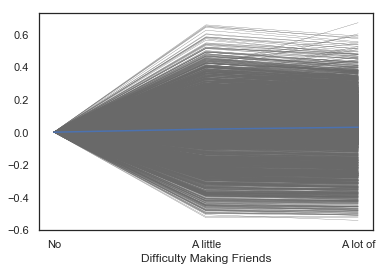

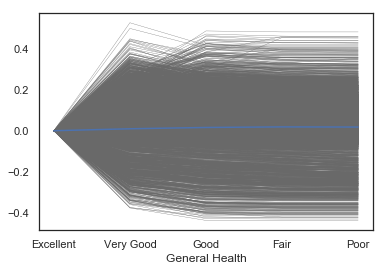

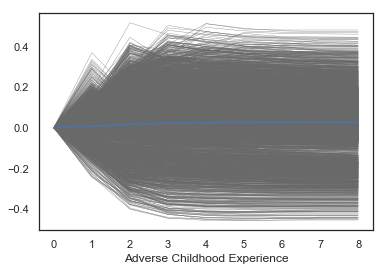

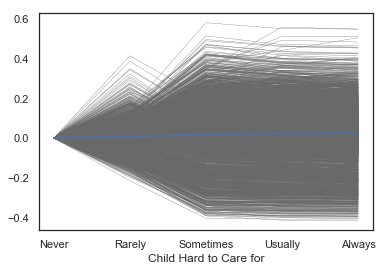

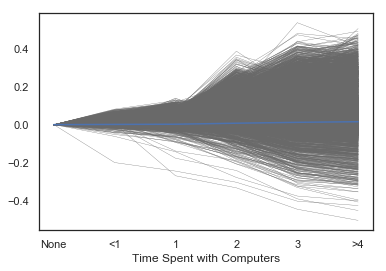

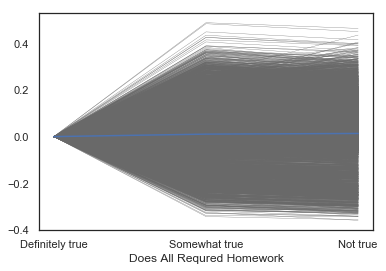

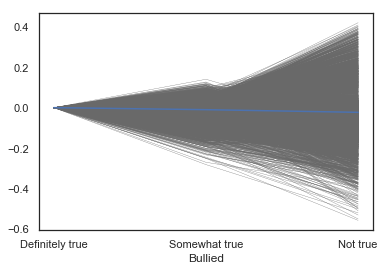

In [36]:
sns.set_style('white')
plot_ice('K2Q33A', 'Anxiety')
plt.xticks([1, 2], ['Yes', 'No'])
plt.savefig('fig3_1')
plt.show()

plot_ice('SC_AGE_YEARS', 'Age')
plt.savefig('fig3_2')
plt.show()

plot_ice('HCABILITY', 'Health Affected Ability')
plt.xticks([1, 2, 3, 4, 5], ['No condition', 'Never', 'Sometimes', 'Usually', 'Always'])
plt.savefig('fig3_3')
plt.show()

plot_ice('MAKEFRIEND', 'Difficulty Making Friends')
plt.xticks([1, 2, 3], ['No', 'A little', 'A lot of'])
plt.savefig('fig3_4')
plt.show()

plot_ice('K2Q01', 'General Health')
plt.xticks([1, 2, 3, 4, 5], ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'])
plt.savefig('fig3_5')
plt.show()

plot_ice('ACE', 'Adverse Childhood Experience')
plt.savefig('fig3_6')
plt.show()

plot_ice('K8Q31', 'Child Hard to Care for')
plt.xticks([1, 2, 3, 4, 5], ['Never', 'Rarely', 'Sometimes', 'Usually', 'Always'])
plt.savefig('fig3_7')
plt.show()

plot_ice('K7Q91_R', 'Time Spent with Computers')
plt.xticks([1, 2, 3, 4, 5, 6], ['None', '<1', '1', '2', '3', '>4'])
plt.savefig('fig3_8')
plt.show()

plot_ice('K7Q83_R', 'Does All Requred Homework')
plt.xticks([1, 2, 3], ['Definitely true', 'Somewhat true', 'Not true'])
plt.savefig('fig3_9')
plt.show()

plot_ice('BULLIED', 'Bullied')
plt.xticks([1, 2, 3], ['Definitely true', 'Somewhat true', 'Not true'])
plt.savefig('fig3_10')
plt.show()